In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.71. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [2]:
df = pd.read_csv('F:/DSC 630/Week 7/train.csv', nrows=200000)
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [3]:
df_test = pd.read_csv("F:/DSC 630/Week 7/test.csv", nrows=200000)
df_destination = pd.read_csv('F:/DSC 630/Week 7/destinations.csv', nrows=200000)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  200000 non-null  object 
 1   site_name                  200000 non-null  int64  
 2   posa_continent             200000 non-null  int64  
 3   user_location_country      200000 non-null  int64  
 4   user_location_region       200000 non-null  int64  
 5   user_location_city         200000 non-null  int64  
 6   orig_destination_distance  130363 non-null  float64
 7   user_id                    200000 non-null  int64  
 8   is_mobile                  200000 non-null  int64  
 9   is_package                 200000 non-null  int64  
 10  channel                    200000 non-null  int64  
 11  srch_ci                    199823 non-null  object 
 12  srch_co                    199823 non-null  object 
 13  srch_adults_cnt            20

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   date_time                  200000 non-null  object 
 2   site_name                  200000 non-null  int64  
 3   posa_continent             200000 non-null  int64  
 4   user_location_country      200000 non-null  int64  
 5   user_location_region       200000 non-null  int64  
 6   user_location_city         200000 non-null  int64  
 7   orig_destination_distance  134527 non-null  float64
 8   user_id                    200000 non-null  int64  
 9   is_mobile                  200000 non-null  int64  
 10  is_package                 200000 non-null  int64  
 11  channel                    200000 non-null  int64  
 12  srch_ci                    199998 non-null  object 
 13  srch_co                    19

In [6]:
df_destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62106 entries, 0 to 62105
Columns: 150 entries, srch_destination_id to d149
dtypes: float64(149), int64(1)
memory usage: 71.1 MB


In [7]:
for c in df.columns:
    miss = df[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

date_time has NO missing value!
site_name has NO missing value!
posa_continent has NO missing value!
user_location_country has NO missing value!
user_location_region has NO missing value!
user_location_city has NO missing value!
orig_destination_distance has 69637 missing value(s)
user_id has NO missing value!
is_mobile has NO missing value!
is_package has NO missing value!
channel has NO missing value!
srch_ci has 177 missing value(s)
srch_co has 177 missing value(s)
srch_adults_cnt has NO missing value!
srch_children_cnt has NO missing value!
srch_rm_cnt has NO missing value!
srch_destination_id has NO missing value!
srch_destination_type_id has NO missing value!
is_booking has NO missing value!
cnt has NO missing value!
hotel_continent has NO missing value!
hotel_country has NO missing value!
hotel_market has NO missing value!
hotel_cluster has NO missing value!


In [8]:
#Check the percentage of missing values in dataset
df_total = df.isnull().sum().sort_values(ascending=False)
df_percent = (df.isnull().sum()/df['hotel_cluster'].count()).sort_values(ascending=False)
df_missing_data = pd.concat([df_total, df_percent], axis=1, keys=['Total', 'Percent'])
df_missing_data.head(20)

,Total,Percent
orig_destination_distance,69637,0.348185
srch_ci,177,0.000885
srch_co,177,0.000885
channel,0,0.000000
site_name,0,0.000000
posa_continent,0,0.000000
user_location_country,0,0.000000
user_location_region,0,0.000000
user_location_city,0,0.000000
user_id,0,0.000000


In [9]:
sweetviz_report = sv.analyze(df)

In [10]:
sweetviz_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


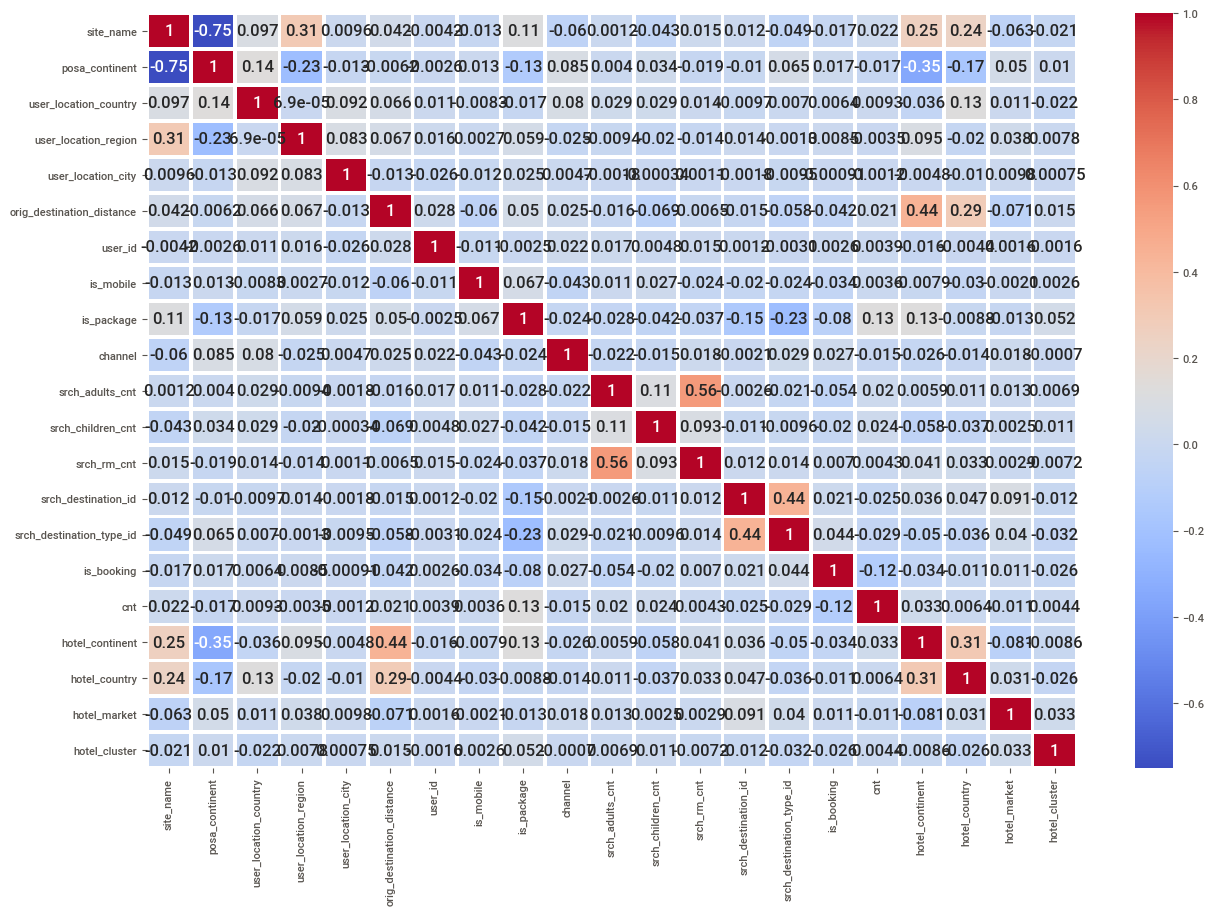

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

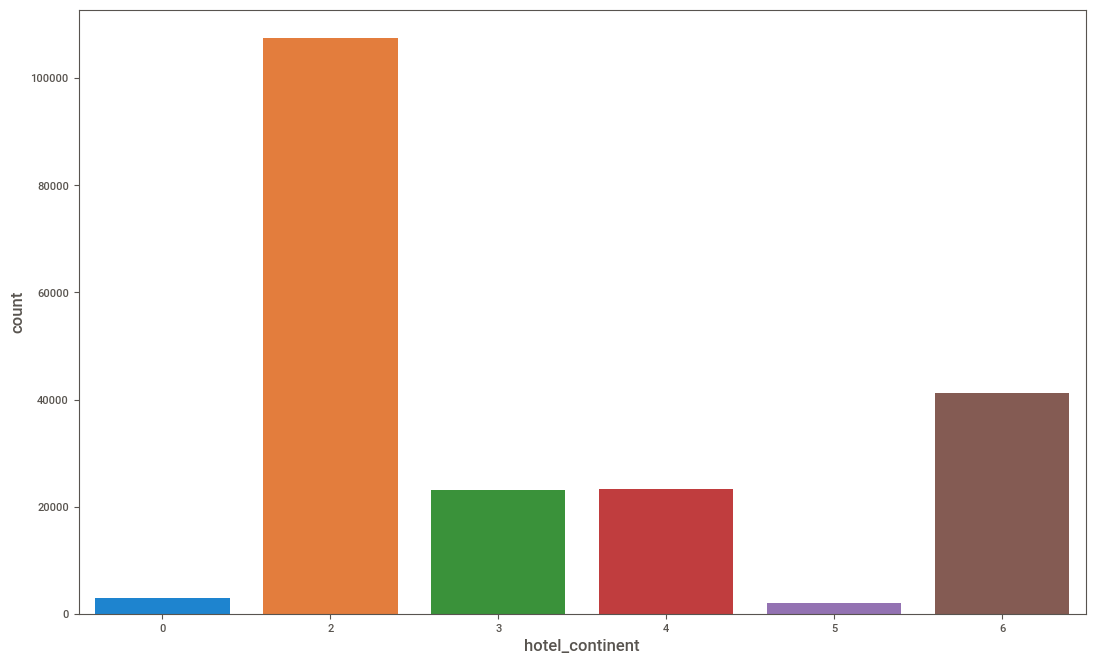

In [12]:
# frequency of hotel continent
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('hotel_continent', data=df,order=[0,2,3,4,5,6],ax=ax)

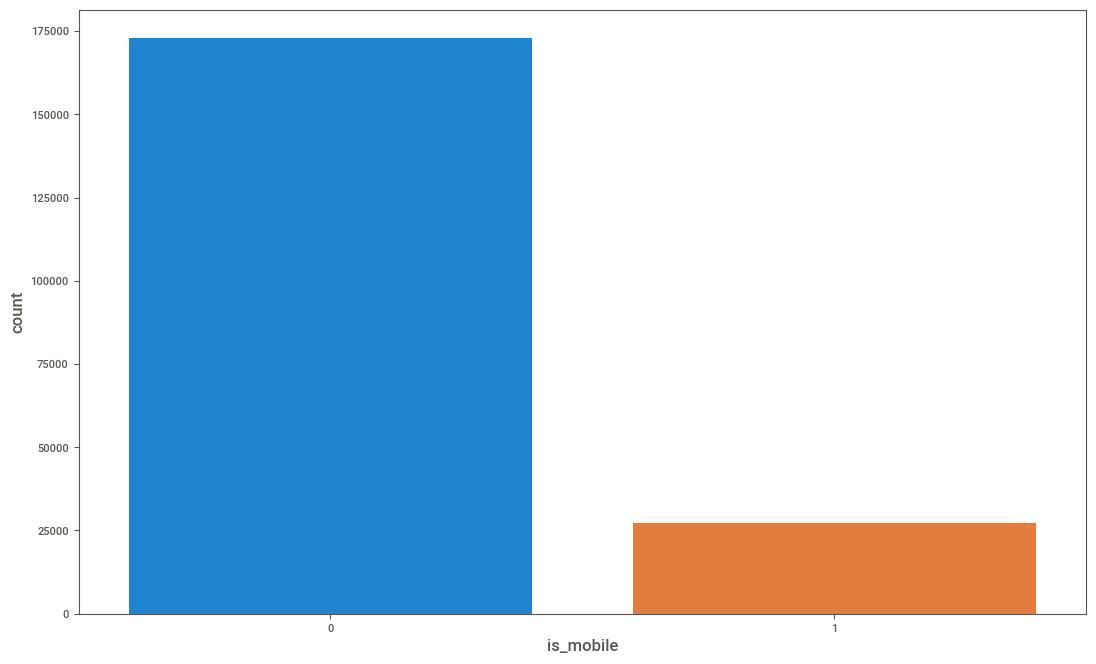

In [13]:
# Frequency of booking through mobile
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_mobile',data=df, order=[0,1],ax=ax)

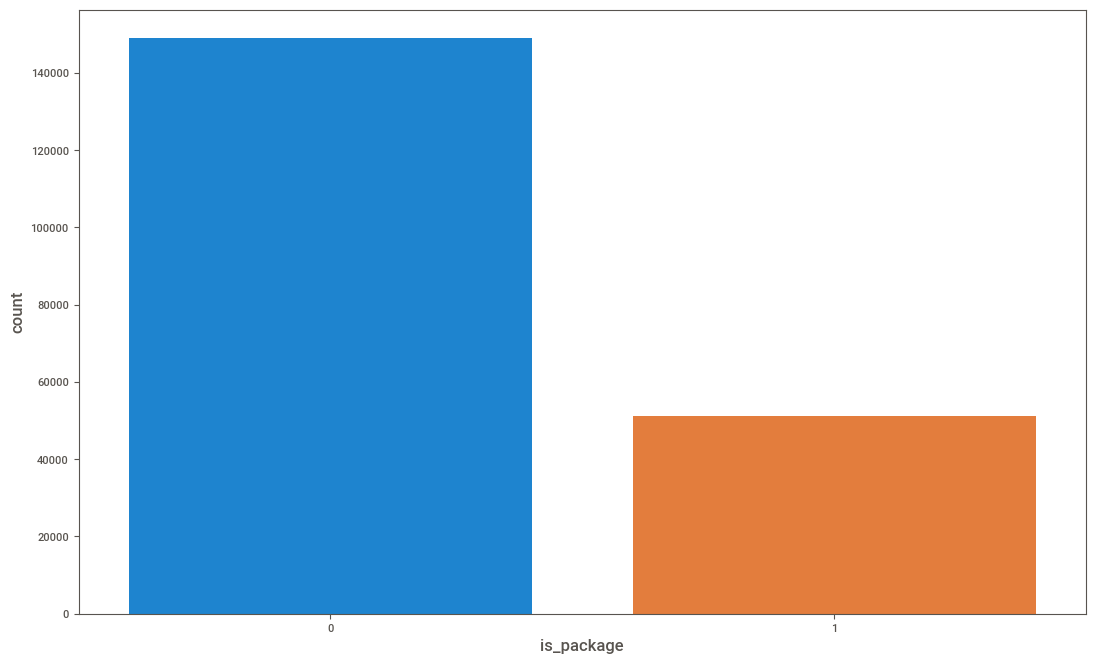

In [14]:
# frequency of bookings with package
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_package',data=df, order=[0,1], ax=ax)

In [15]:
# Function to convert date object into relevant attributes
def convert_date_into_days(df):
    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
    df['srch_co'] = pd.to_datetime(df['srch_co'])
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    df['stay_dur'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
    df['no_of_days_bet_booking'] = (df['srch_ci'] - df['date_time']).astype('timedelta64[D]')
    
    # For hotel check-in
    # Month, Year, Day
    df['Cin_day'] = df["srch_ci"].apply(lambda x: x.day)
    df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['Cin_year'] = df["srch_ci"].apply(lambda x: x.year)

In [16]:
convert_date_into_days(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  200000 non-null  datetime64[ns]
 1   site_name                  200000 non-null  int64         
 2   posa_continent             200000 non-null  int64         
 3   user_location_country      200000 non-null  int64         
 4   user_location_region       200000 non-null  int64         
 5   user_location_city         200000 non-null  int64         
 6   orig_destination_distance  130363 non-null  float64       
 7   user_id                    200000 non-null  int64         
 8   is_mobile                  200000 non-null  int64         
 9   is_package                 200000 non-null  int64         
 10  channel                    200000 non-null  int64         
 11  srch_ci                    199823 non-null  datetime

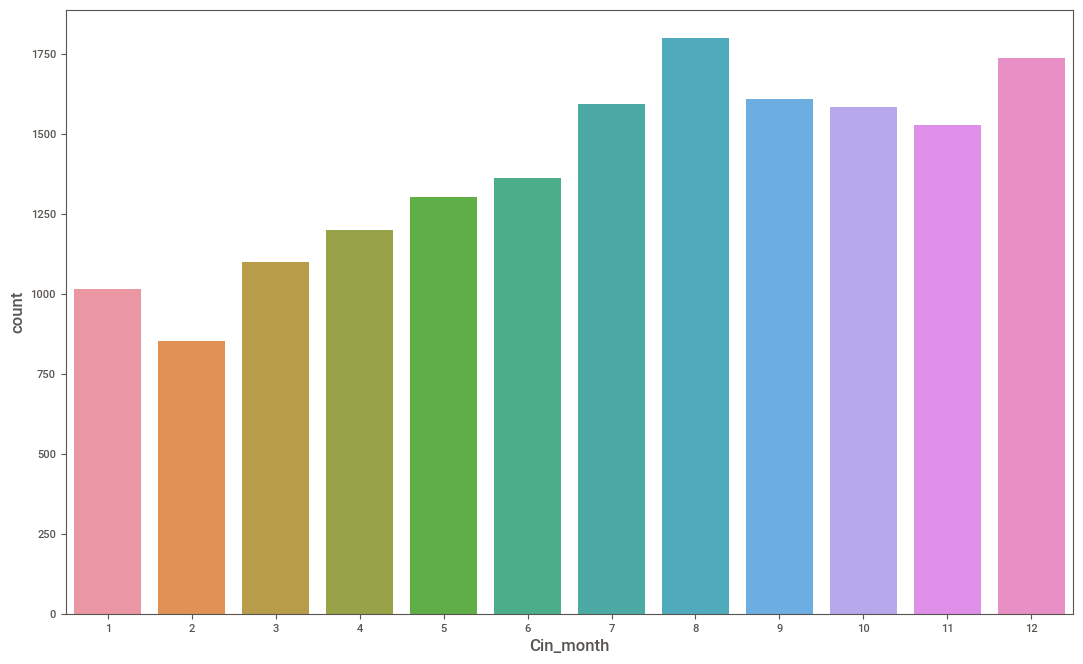

In [17]:
# Count the bookings in each month
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('Cin_month',data=df[df["is_booking"] == 1],order=list(range(1,13)),ax=ax)

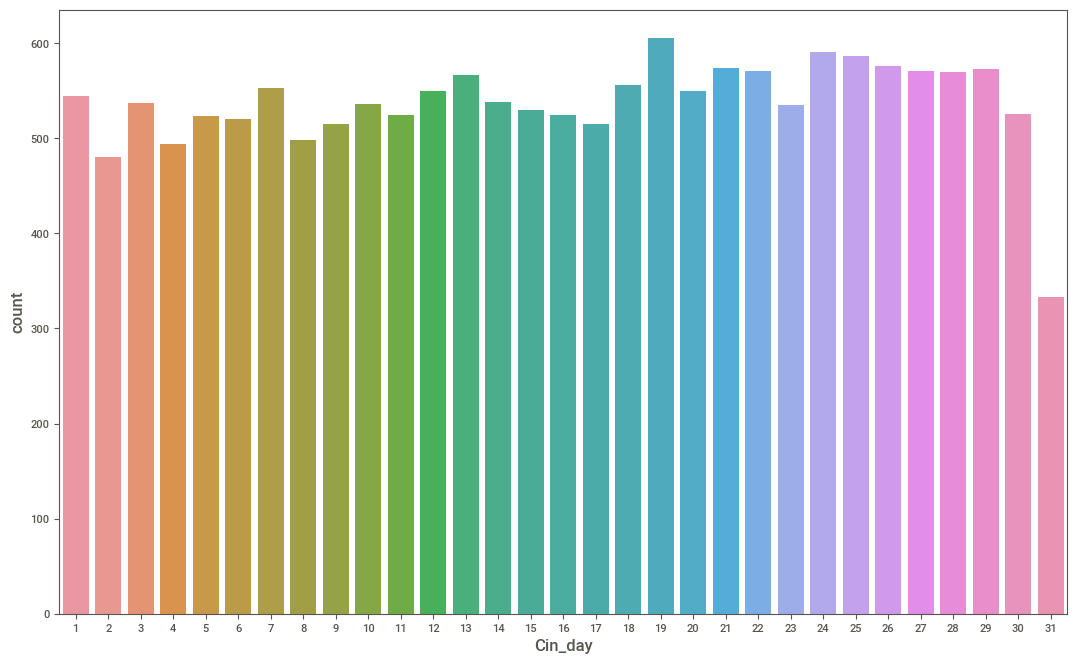

In [18]:
# Count the bookings as per the day
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('Cin_day',data=df[df["is_booking"] == 1],order=list(range(1,32)),ax=ax)

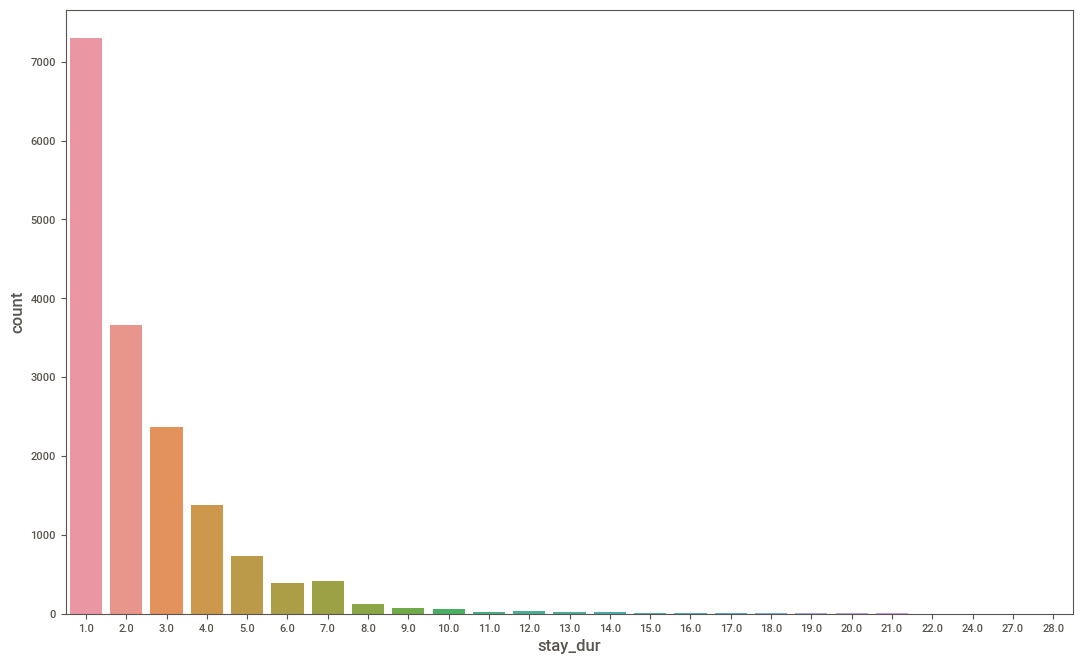

In [19]:
# Count the bookings as per the stay_duration
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('stay_dur',data=df[df["is_booking"] == 1],ax=ax)

In [20]:
#df['Cin_day'].value_counts() = 26
#df['Cin_month'].value_counts() = 8
#df['Cin_year'].value_counts() = 2014
#df['stay_dur'].value_counts() = 1
#df['no_of_days_bet_booking'].value_counts() = 0
df['Cin_day'] = df['Cin_day'].fillna(26.0)
df['Cin_month'] = df['Cin_month'].fillna(8.0)
df['Cin_year'] = df['Cin_year'].fillna(2014.0)
df['stay_dur'] = df['stay_dur'].fillna(1.0)
df['no_of_days_bet_booking'] = df['no_of_days_bet_booking'].fillna(0.0)

In [21]:
# Fill average values in place for nan, fill with mean
df['orig_destination_distance'].fillna(df['orig_destination_distance'].mean(), inplace=True)
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,3,2,50,628,1,4.0,15.0,27.0,8.0,2014.0
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,1,2,50,1457,80,5.0,105.0,23.0,11.0,2014.0
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,1,2,50,1457,21,5.0,105.0,23.0,11.0,2014.0


In [22]:
#in order to use ML model, we drop the cloumns whose type is object
#we also need to separate x and y 

Y = df['is_booking']
X = df.drop(['date_time','orig_destination_distance','srch_ci','srch_co','is_booking','stay_dur','no_of_days_bet_booking',
            'Cin_day','Cin_month','Cin_year','hotel_cluster'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   site_name                 200000 non-null  int64
 1   posa_continent            200000 non-null  int64
 2   user_location_country     200000 non-null  int64
 3   user_location_region      200000 non-null  int64
 4   user_location_city        200000 non-null  int64
 5   user_id                   200000 non-null  int64
 6   is_mobile                 200000 non-null  int64
 7   is_package                200000 non-null  int64
 8   channel                   200000 non-null  int64
 9   srch_adults_cnt           200000 non-null  int64
 10  srch_children_cnt         200000 non-null  int64
 11  srch_rm_cnt               200000 non-null  int64
 12  srch_destination_id       200000 non-null  int64
 13  srch_destination_type_id  200000 non-null  int64
 14  cnt                 

In [23]:
#divide train data into 2 parts: "learning" set and "testing" set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print(len(X_train))
print(len(X_test))

170000
30000


In [24]:
#first ML algorithm: RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
clf = RandomForestClassifier(n_estimators=80)
model_1=clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(Y_test,y_pred)
#prec=precision_score(Y_test, y_pred,average='micro')
#recall=recall_score(Y_test, y_pred)
#f1_v=f1_score(Y_test, y_pred)
print("Accuracy:" ,acc)
print( "confusion_matrix")
print( confusion_matrix(Y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print(clf.feature_importances_)

Accuracy: 0.8783
confusion_matrix
[[26279  1225]
 [ 2426    70]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     27504
           1       0.05      0.03      0.04      2496

    accuracy                           0.88     30000
   macro avg       0.48      0.49      0.49     30000
weighted avg       0.84      0.88      0.86     30000

[0.02038789 0.00883827 0.0321409  0.1053132  0.15466878 0.15611586
 0.0125789  0.0113458  0.04983084 0.03510298 0.03006559 0.01304169
 0.13353479 0.02394128 0.0468823  0.01475162 0.03493457 0.11652474]


In [25]:
#second ML algorithm: GaussianNB()
from sklearn.naive_bayes import GaussianNB
mnb = GaussianNB()
model_2=mnb.fit(X_train,Y_train) 
y_predict = mnb.predict(X_test)
acc=accuracy_score(Y_test,y_predict)
#prec=precision_score(Y_test, y_pred,average='micro')
#recall=recall_score(Y_test, y_pred)
#f1_v=f1_score(Y_test, y_pred)
print("Accuracy:" ,acc)
print( "confusion_matrix")
print( confusion_matrix(Y_test, y_predict))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict))

Accuracy: 0.9168
confusion_matrix
[[27504     0]
 [ 2496     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27504
           1       0.00      0.00      0.00      2496

    accuracy                           0.92     30000
   macro avg       0.46      0.50      0.48     30000
weighted avg       0.84      0.92      0.88     30000



In [26]:
#Third ML algorithm:Logistic
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_3=lr.fit(X_train, Y_train)
y_predict = lr.predict(X_test)
acc=accuracy_score(Y_test,y_predict)
#prec=precision_score(Y_test, y_pred,average='micro')
#recall=recall_score(Y_test, y_pred)
#f1_v=f1_score(Y_test, y_pred)
print("Accuracy:" ,acc)
print( "confusion_matrix")
print( confusion_matrix(Y_test, y_predict))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict))

Accuracy: 0.9168
confusion_matrix
[[27504     0]
 [ 2496     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27504
           1       0.00      0.00      0.00      2496

    accuracy                           0.92     30000
   macro avg       0.46      0.50      0.48     30000
weighted avg       0.84      0.92      0.88     30000



## Report Accuracy on the Test Data

In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   date_time                  200000 non-null  object 
 2   site_name                  200000 non-null  int64  
 3   posa_continent             200000 non-null  int64  
 4   user_location_country      200000 non-null  int64  
 5   user_location_region       200000 non-null  int64  
 6   user_location_city         200000 non-null  int64  
 7   orig_destination_distance  134527 non-null  float64
 8   user_id                    200000 non-null  int64  
 9   is_mobile                  200000 non-null  int64  
 10  is_package                 200000 non-null  int64  
 11  channel                    200000 non-null  int64  
 12  srch_ci                    199998 non-null  object 
 13  srch_co                    19

In [28]:
#in order to use ML model, we drop the cloumns whose type is object
#we also need to separate x and y 

feature = df_test.drop(['date_time','orig_destination_distance','srch_ci','srch_co'],axis=1)
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   id                        200000 non-null  int64
 1   site_name                 200000 non-null  int64
 2   posa_continent            200000 non-null  int64
 3   user_location_country     200000 non-null  int64
 4   user_location_region      200000 non-null  int64
 5   user_location_city        200000 non-null  int64
 6   user_id                   200000 non-null  int64
 7   is_mobile                 200000 non-null  int64
 8   is_package                200000 non-null  int64
 9   channel                   200000 non-null  int64
 10  srch_adults_cnt           200000 non-null  int64
 11  srch_children_cnt         200000 non-null  int64
 12  srch_rm_cnt               200000 non-null  int64
 13  srch_destination_id       200000 non-null  int64
 14  srch_destination_typ

In [30]:
model_1.predict(feature)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)